In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Use of the `HSDetection` class

In [2]:
from hs2 import HSDetection
from probe import HierlmannVisapyEmulationProbe
import numpy as np
import h5py

In [3]:
# raw data location
data_path = 'rawHierlmannVisapy.npy'

# detection parameters
to_localize = True
cutout_start = 10
cutout_end = 20
threshold = 12
file_name = 'results/ProcessedSpikes_visapy'

In [4]:
Probe = HierlmannVisapyEmulationProbe(data_path)
H = HSDetection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name, save_all=True)

122400102
102


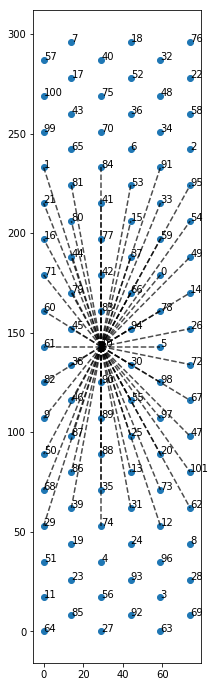

In [5]:
Probe.show()

In [6]:
H.DetectFromRaw()

# Sampling rate: 32000
# Localization On
# Not Masking any Channels
# Writing out ectended detection info
# Number of recorded channels: 102
# Analysing frames: 1200001, Seconds:37
# Frames before spike in cutout: 32
# Frames after spike in cutout: 70
# tcuts: 44 59
# tInc: 50000
# Analysing 50000 frames; from -44 to 50059
# Analysing 50000 frames; from 49956 to 100059
# Analysing 50000 frames; from 99956 to 150059
# Analysing 50000 frames; from 149956 to 200059
# Analysing 50000 frames; from 199956 to 250059
# Analysing 50000 frames; from 249956 to 300059
# Analysing 50000 frames; from 299956 to 350059
# Analysing 50000 frames; from 349956 to 400059
# Analysing 50000 frames; from 399956 to 450059
# Analysing 50000 frames; from 449956 to 500059
# Analysing 50000 frames; from 499956 to 550059
# Analysing 50000 frames; from 549956 to 600059
# Analysing 50000 frames; from 599956 to 650059
# Analysing 50000 frames; from 649956 to 700059
# Analysing 50000 frames; from 699956 to 750059
# Ana

In [7]:
H.LoadDetected()

Detected and read 53748 spikes.


('Spike detected at channel: ', 17)
('Spike detected at frame: ', 10309)
(6.6210000000000004, 279.06700000000001)


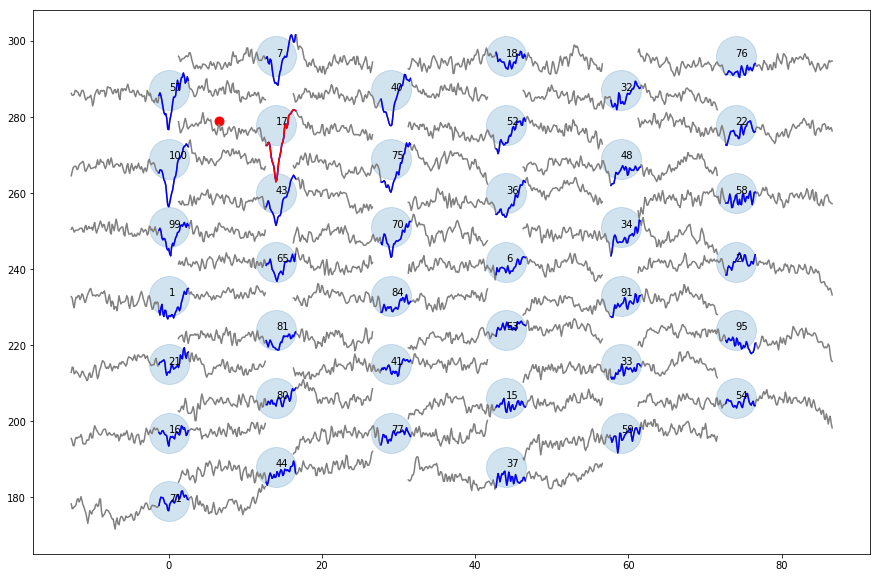

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
H.PlotTracesChannels(510)

In [34]:
def closestChannels(neurons):
    closest_channels = []
    for neuron in neurons:
        dists = np.sqrt((elec_x-somapos[0][neuron][0])**2+(elec_y-somapos[0][neuron][1])**2)
        chinds = np.argsort(dists) # sort by distance, first is closest
        closest_channels.append((neuron, chinds[0]))
    return closest_channels
print(closestChannels([20]))

[(20, 9)]


52


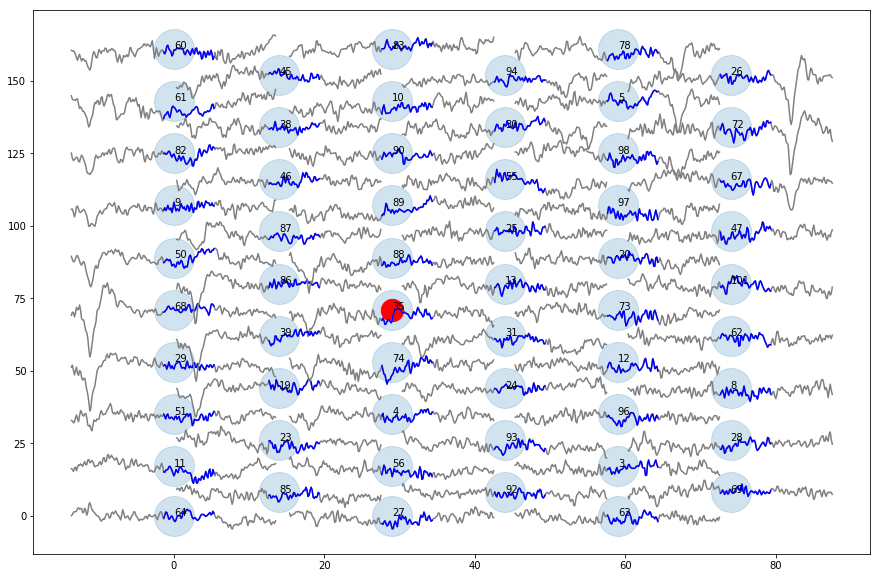

In [44]:
def closestChannels(neurons):
    closest_channels = []
    for neuron in neurons:
        dists = np.sqrt((elec_x-somapos[0][neuron][0])**2+(elec_y-somapos[0][neuron][1])**2)
        chinds = np.argsort(dists) # sort by distance, first is closest
        closest_channels.append((neuron, chinds[0]))
    return closest_channels
plt.figure(figsize=(15, 10))
print(closestChannels([50])[0][1])
H.PlotData(50, 10308, closestChannels([13])[0][1])

In [13]:
groundt[:100]


array([[   47, 10029],
       [   35, 10078],
       [   27, 10094],
       [   42, 10109],
       [   41, 10110],
       [   55, 10110],
       [   49, 10135],
       [   20, 10160],
       [   21, 10169],
       [   52, 10170],
       [   30, 10201],
       [   25, 10223],
       [   13, 10225],
       [    8, 10235],
       [   26, 10252],
       [   51, 10299],
       [    2, 10306],
       [   50, 10308],
       [   40, 10322],
       [    1, 10327],
       [   28, 10365],
       [   32, 10382],
       [   27, 10389],
       [   44, 10410],
       [   46, 10411],
       [   56, 10419],
       [   29, 10424],
       [   36, 10431],
       [   19, 10433],
       [   53, 10435],
       [   39, 10441],
       [   10, 10443],
       [   18, 10489],
       [   24, 10504],
       [   15, 10506],
       [   47, 10510],
       [    7, 10513],
       [   48, 10515],
       [   14, 10528],
       [   54, 10587],
       [   31, 10609],
       [   25, 10616],
       [   45, 10616],
       [   

In [11]:
rawdata = h5py.File('ViSAPy_nonfiltered.h5','r')
elec_x_int = np.load('z_integer.npy')
elec_y_int = np.load('y_integer.npy')
ky = 9 / np.max(np.diff(sorted(elec_y_int)))
elec_x = elec_x_int * ky
elec_y = elec_y_int * ky
elec_x -= np.min(elec_x)
elec_y -= np.min(elec_y)
#ground truth spikes
#1. neuron id
#2. time stamp
groundt = np.loadtxt('ViSAPy_ground_truth.gdf').astype(int)
#locations of simulated neurons (x,y,z),
somapos = np.loadtxt('ViSAPy_somapos.gdf'),
pca_computed = False

In [22]:
print(somapos[0][11])

[ 62.46587907  29.46580954 -86.07439346]


10094
10094
10094
10094
10094
10094
10094


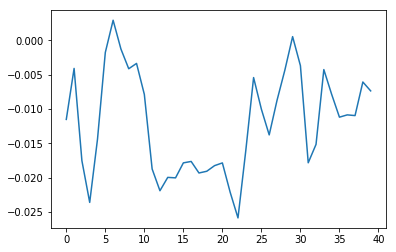

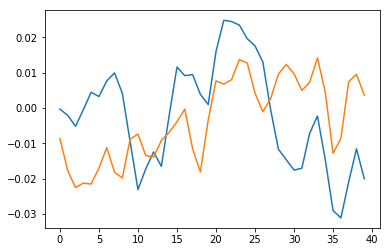

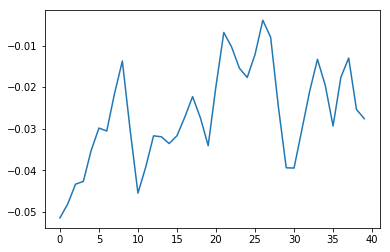

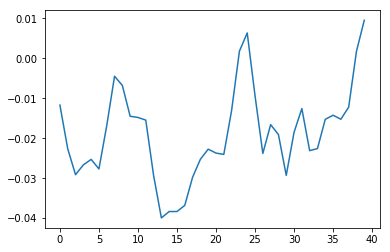

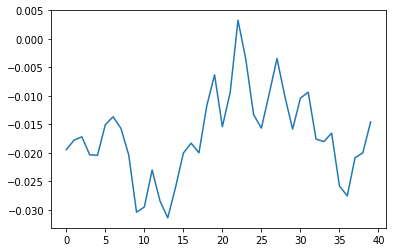

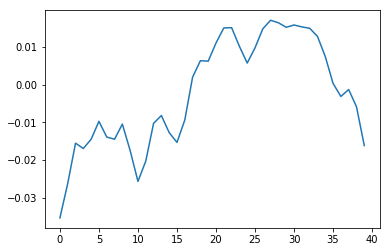

In [32]:
spinds = [2]
neighbors = [5,  90,  10,  98,  55,  94]
for i in groundt[spinds,1][:]:
    print(i)
    plt.plot(rawdata['data'][i-10:i+30, 30])
    neighbors
for j, neighbor in enumerate(neighbors):
    plt.figure(j)
    for i in groundt[spinds,1][:]:
        print(i)
        plt.plot(rawdata['data'][i-10:i+30, neighbor])

('neuron ', 27, ' at location ', array([  43.0325968 ,  142.41476095,  -86.49340415]))
('neuron spiked ', 1794, ' times')
('closest channel is ', 30, ' at ', 44.655436447166949, 134.98713629402755)
10094


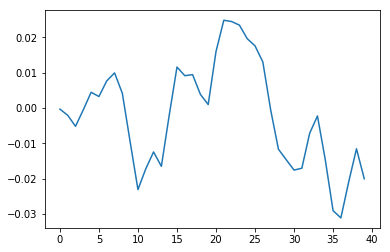

In [26]:
neuron = 26
print('neuron ',neuron + 1,' at location ',somapos[0][neuron])
# get all spikes made by that neuron
spinds = np.where(groundt[:,0] == neuron + 1)[0]
print('neuron spiked ',len(spinds),' times')
# get the closest channels
dists = np.sqrt((elec_x-somapos[0][neuron][0])**2+(elec_y-somapos[0][neuron][1])**2)
chinds = np.argsort(dists) # sort by distance, first is closest
print('closest channel is ', chinds[0],' at ',elec_x[chinds[0]],elec_y[chinds[0]])
    
for i in groundt[spinds,1][:1]:
    print(i)
    plt.plot(rawdata['data'][i-10:i+30, chinds[0]])
    
#     for spike_time in groundt[spinds,1]:
#         waveform = rawdata['data'][spike_time-10:spike_time+20, chinds[0]]
#         x, y = getLocationEstimate(spike_time, chinds)
#         waveform = list(waveform)
#         waveform.append(x)
#         waveform.append(y)
#         training_data.append(np.asarray(waveform))

In [ ]:
H.spikes.Shape[10].mean()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1, alpha=0.05)
plt.axis('equal');

# Use of the `HSClustering` class

In [ ]:
from hs2 import HSClustering
from sklearn.cluster import DBSCAN

In [ ]:
# Load from file
#C = Clustering(['results/ProcessedSpikes_mea1k.bin', 'results/ProcessedSpikes_mea1k.bin'], cutout_length=41)

# Or if the spikes are already in memory
# simply load from the Detection class
C = HSClustering(H)

In [ ]:
C.ShapePCA(pca_ncomponents=2, pca_whiten=True)

C.CombinedClustering(alpha=0.4, bandwidth=0.3, bin_seeding=True,
                     min_bin_freq=100, n_jobs=-1)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
C.PlotAll(invert=True, s=1, show_labels=True)
plt.title("MeanShift, bandwidth=.3, min_bin_freq=10");
plt.xlim([0,25])
plt.ylim([0,25])

In [ ]:
C.CombinedClustering(eps=0.2, alpha=0.4, clustering_algorithm=DBSCAN,
                    min_samples=5, n_jobs=-1)

In [ ]:
plt.figure(figsize=(12, 12))
C.PlotAll(invert=True, s=1)
plt.title("DBSCAN eps=0.2, min_samples=5")
# plt.xlim((1350,1600))

In [ ]:
units = (0, 1, 10, 100, 1000)

C.PlotShapes(units)

In [ ]:
C.SaveHDF5("results/f1.hdf5")